## 범주형 데이터

In [1]:
## Data
install.packages("caret")
library(caret)
mydata = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(mydata)
str(mydata)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [2]:
## 변수 factor화
mydata$admit = as.factor(mydata$admit)
mydata$rank = as.factor(mydata$rank)
summary(mydata)

 admit        gre             gpa        rank   
 0:273   Min.   :220.0   Min.   :2.260   1: 61  
 1:127   1st Qu.:520.0   1st Qu.:3.130   2:151  
         Median :580.0   Median :3.395   3:121  
         Mean   :587.7   Mean   :3.390   4: 67  
         3rd Qu.:660.0   3rd Qu.:3.670          
         Max.   :800.0   Max.   :4.000          

In [3]:
## training & validation data 분할
library(caret)
my.ind = createDataPartition(y = mydata$admit, p = 0.75, list = FALSE)
my.training = mydata[my.ind, ]
my.val = mydata[-my.ind, ]


In [5]:
## tree 적합
install.packages("rpart")
library(rpart)
set.seed(123)
rpart.fit1 = rpart(admit ~ ., data = my.training, control = list(maxdepth = 1))
set.seed(123)
rpart.fit2 = rpart(admit ~ ., data = my.training, control = list(maxdepth = 2))
set.seed(123)
rpart.fit3 = rpart(admit ~ ., data = my.training, control = list(maxdepth = 3))
set.seed(123)
rpart.fit5 = rpart(admit ~ ., data = my.training, control = list(maxdepth = 5))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’, ‘rpart.plot’


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



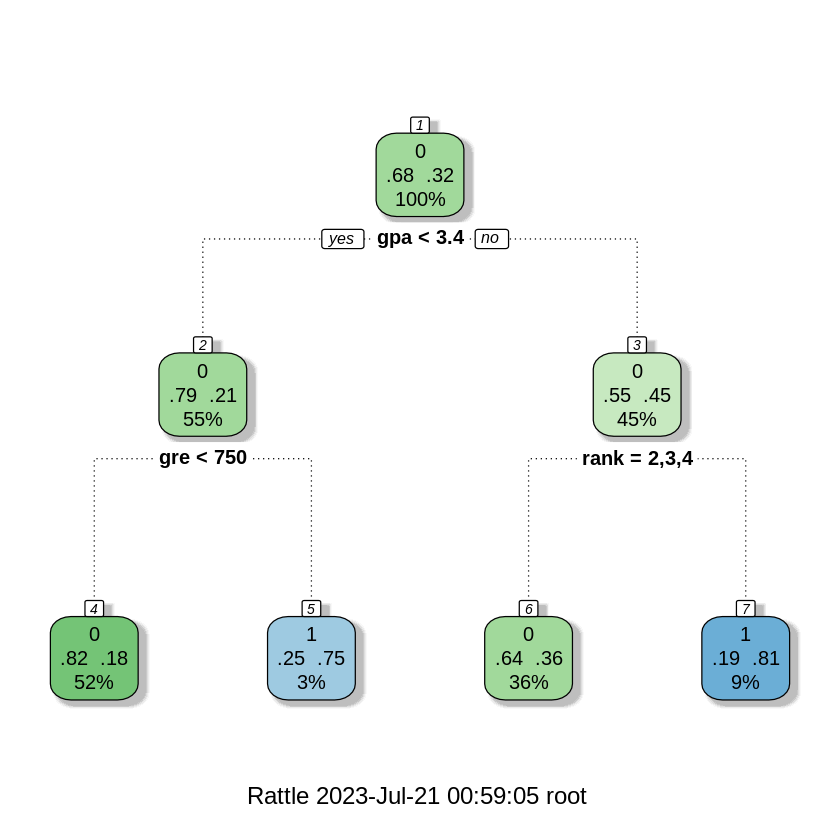

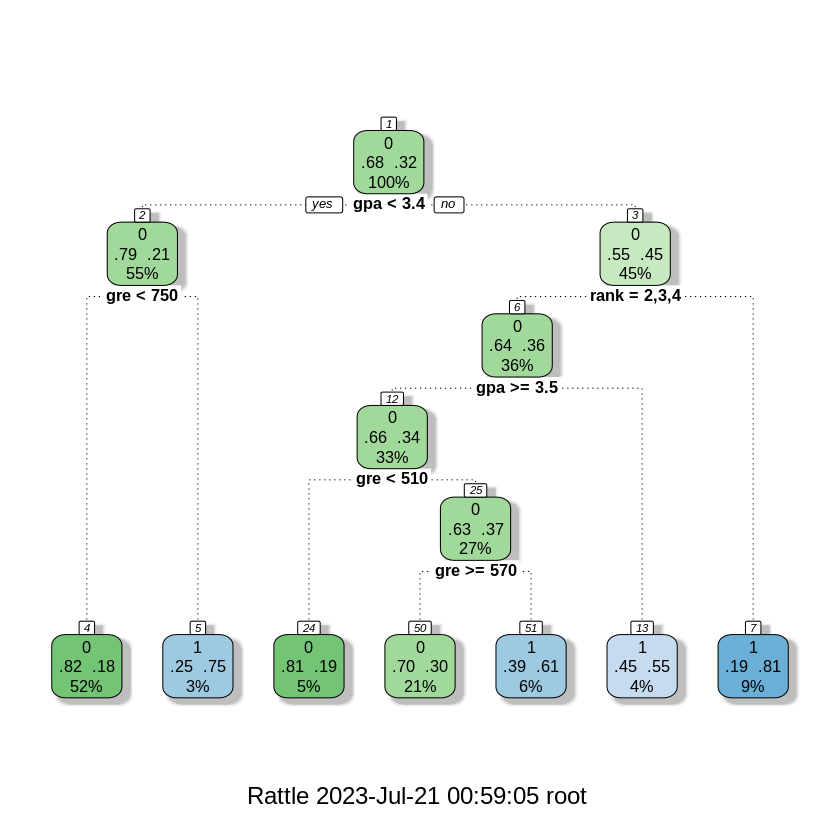

In [6]:
## tree 적합 그래프 생성
install.packages("rattle")
library(rattle)
fancyRpartPlot(rpart.fit2)
fancyRpartPlot(rpart.fit5)

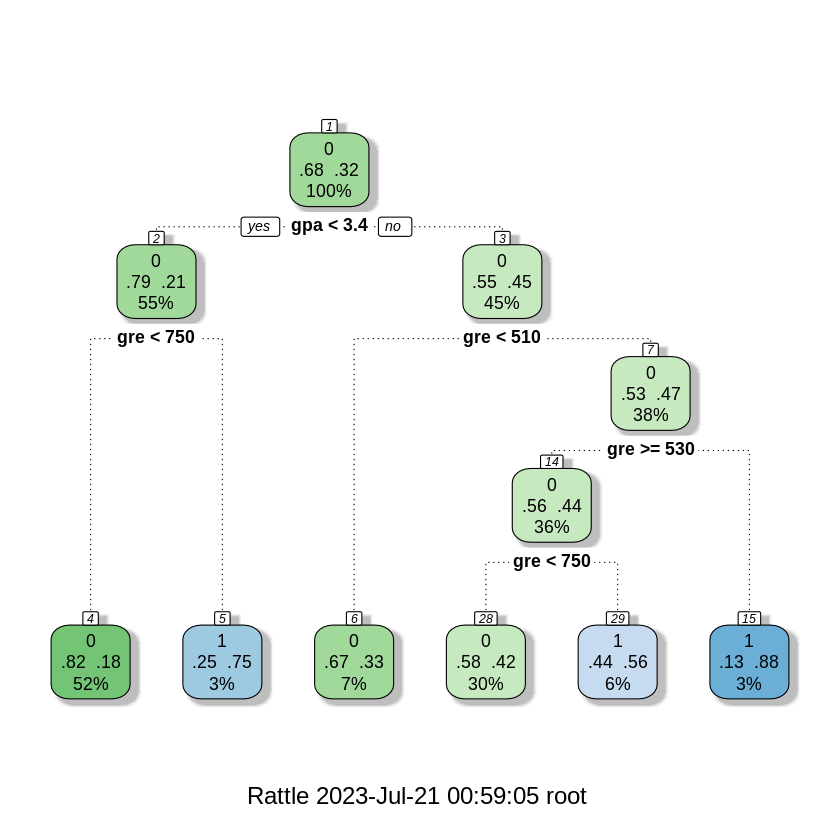

In [7]:
## 그래프를 그리기 위한 데이터 정렬
train = my.training[order(my.training[, "admit"]), ]
rpart.fit5 = rpart(admit ~ gre + gpa, data = train, control = list(maxdepth = 5))
fancyRpartPlot(rpart.fit5)

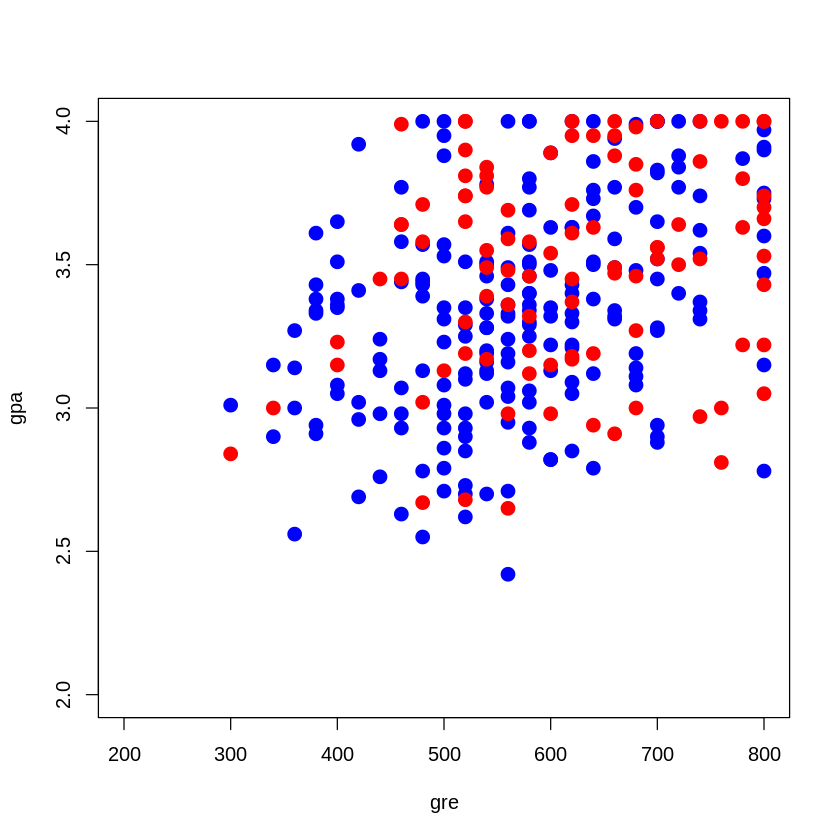

In [8]:
## training 자료 그래프 생성
px = seq(200, 800, 5)
py = seq(2, 4, 0.05)
pgrid = expand.grid(px, py)
names(pgrid) = names(train)[c(2, 3)]
rpart.fit1 = rpart(admit ~ ., data = my.training, control = list(maxdepth = 1))

plot(c(), type = "n", xlim = c(200, 800), ylim = c(2, 4), xlab = "", ylab = "")
par(new = T)
plot(train[, c(2, 3)], col = c(rep("blue", 205), rep("red", 96)), xlim = c(200, 800),
     ylim = c(2, 4), pch = 19, cex = 1.5, axes = F)

Warning message in par(new = T):
“calling par(new=TRUE) with no plot”


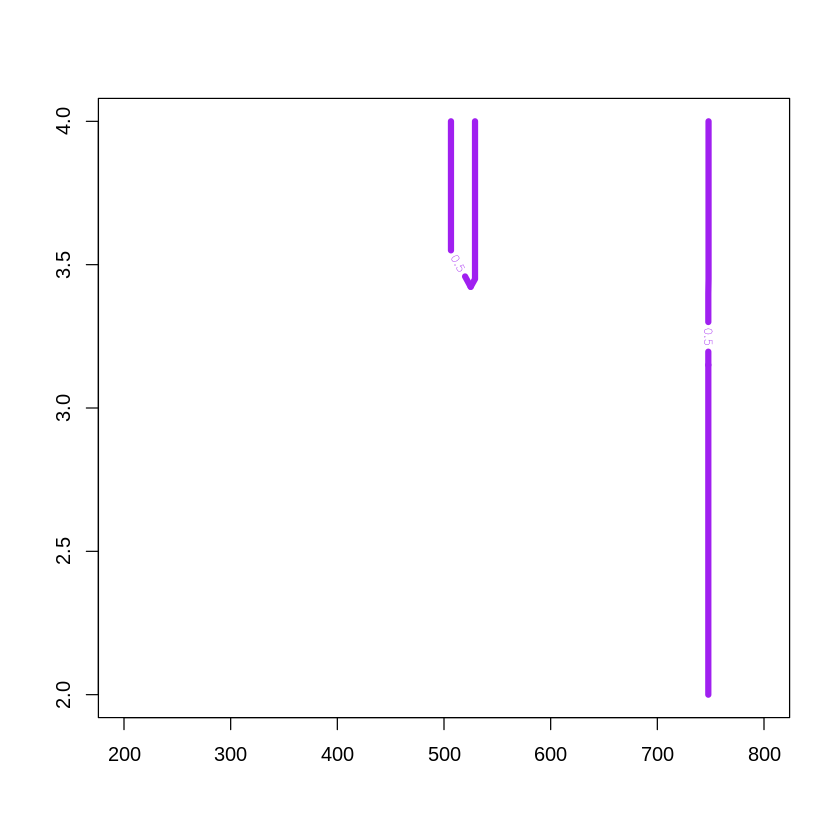

In [9]:
## 의사결정나무 모형 적합 결과 추가
par(new = T)
contour(px, py, array(predict(rpart.fit5, newdata = pgrid), dim = c(length(px), length(py))),
        xlim = c(200, 800), ylim = c(2, 4), col = "purple", lwd = 5, drawlabels = T, levels = 0.5)

In [10]:
## 의사결정나무 적합 모형을 통한 예측
rpart.pred1 = as.factor(predict(rpart.fit1, newdata = my.val, type = "class"))
rpart.pred2 = as.factor(predict(rpart.fit2, newdata = my.val, type = "class"))
rpart.pred3 = as.factor(predict(rpart.fit3, newdata = my.val, type = "class"))
rpart.pred5 = as.factor(predict(rpart.fit5, newdata = my.val, type = "class"))

In [11]:
confusionMatrix(my.val$admit, rpart.pred1)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 68  0
         1 31  0
                                          
               Accuracy : 0.6869          
                 95% CI : (0.5859, 0.7764)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 7.118e-08       
                                          
            Sensitivity : 0.6869          
            Specificity :     NA          
         Pos Pred Value :     NA          
         Neg Pred Value :     NA          
             Prevalence : 1.0000          
         Detection Rate : 0.6869          
   Detection Prevalence : 0.6869          
      Balanced Accuracy :     NA          
                                          
       'Positive' Class : 0               
                                    

In [12]:
confusionMatrix(my.val$admit, rpart.pred2)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 62  6
         1 28  3
                                          
               Accuracy : 0.6566          
                 95% CI : (0.5544, 0.7491)
    No Information Rate : 0.9091          
    P-Value [Acc > NIR] : 1.0000000       
                                          
                  Kappa : 0.0106          
                                          
 Mcnemar's Test P-Value : 0.0003164       
                                          
            Sensitivity : 0.68889         
            Specificity : 0.33333         
         Pos Pred Value : 0.91176         
         Neg Pred Value : 0.09677         
             Prevalence : 0.90909         
         Detection Rate : 0.62626         
   Detection Prevalence : 0.68687         
      Balanced Accuracy : 0.51111         
                                          
       'Positive' Class : 0               
                                    

In [13]:
confusionMatrix(my.val$admit, rpart.pred3)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 59  9
         1 27  4
                                          
               Accuracy : 0.6364          
                 95% CI : (0.5336, 0.7307)
    No Information Rate : 0.8687          
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : -0.0039         
                                          
 Mcnemar's Test P-Value : 0.004607        
                                          
            Sensitivity : 0.6860          
            Specificity : 0.3077          
         Pos Pred Value : 0.8676          
         Neg Pred Value : 0.1290          
             Prevalence : 0.8687          
         Detection Rate : 0.5960          
   Detection Prevalence : 0.6869          
      Balanced Accuracy : 0.4969          
                                          
       'Positive' Class : 0               
                                    

In [14]:
confusionMatrix(my.val$admit, rpart.pred5)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 62  6
         1 28  3
                                          
               Accuracy : 0.6566          
                 95% CI : (0.5544, 0.7491)
    No Information Rate : 0.9091          
    P-Value [Acc > NIR] : 1.0000000       
                                          
                  Kappa : 0.0106          
                                          
 Mcnemar's Test P-Value : 0.0003164       
                                          
            Sensitivity : 0.68889         
            Specificity : 0.33333         
         Pos Pred Value : 0.91176         
         Neg Pred Value : 0.09677         
             Prevalence : 0.90909         
         Detection Rate : 0.62626         
   Detection Prevalence : 0.68687         
      Balanced Accuracy : 0.51111         
                                          
       'Positive' Class : 0               
                                    

## 연속형 데이터

In [15]:
## regression 분석을 위한 data 생성
reg.data = read.csv("https://stats.idre.ucla.edu/wp-content/uploads/2019/02/elemapi2v2.csv")
summary(reg.data)

      snum           dnum           api00           api99      
 Min.   :  58   Min.   : 41.0   Min.   :369.0   Min.   :333.0  
 1st Qu.:1720   1st Qu.:395.0   1st Qu.:523.8   1st Qu.:484.8  
 Median :3008   Median :401.0   Median :643.0   Median :602.0  
 Mean   :2867   Mean   :457.7   Mean   :647.6   Mean   :610.2  
 3rd Qu.:4198   3rd Qu.:630.0   3rd Qu.:762.2   3rd Qu.:731.2  
 Max.   :6072   Max.   :796.0   Max.   :940.0   Max.   :917.0  
                                                               
     growth           meals             ell            yr_rnd    
 Min.   :-69.00   Min.   :  0.00   Min.   : 0.00   Min.   :0.00  
 1st Qu.: 19.00   1st Qu.: 31.00   1st Qu.: 9.75   1st Qu.:0.00  
 Median : 36.00   Median : 67.50   Median :25.00   Median :0.00  
 Mean   : 37.41   Mean   : 60.31   Mean   :31.45   Mean   :0.23  
 3rd Qu.: 53.25   3rd Qu.: 90.00   3rd Qu.:50.25   3rd Qu.:0.00  
 Max.   :134.00   Max.   :100.00   Max.   :91.00   Max.   :1.00  
                          

In [16]:
regdata.ind = createDataPartition(y = reg.data$api00, p = 0.75, list = FALSE)
reg.training = reg.data[regdata.ind, ]
reg.val = reg.data[-regdata.ind, ]

In [17]:
## regression tree 적합
set.seed(123)
rpart.fit1 = rpart(api00 ~ enroll + full + col_grad + emer, data = reg.training,
                   control = list(maxdepth = 1))
set.seed(123)
rpart.fit2 = rpart(api00 ~ enroll + full + col_grad + emer, data = reg.training,
                   control = list(maxdepth = 2))
set.seed(123)
rpart.fit3 = rpart(api00 ~ enroll + full + col_grad + emer, data = reg.training,
                   control = list(maxdepth = 3))
set.seed(123)
rpart.fit5 = rpart(api00 ~ enroll + full + col_grad + emer, data = reg.training,
                   control = list(maxdepth = 5))

In [18]:
## 예측
rpart.pred1 = predict(rpart.fit1, newdata = reg.val)
rpart.pred2 = predict(rpart.fit2, newdata = reg.val)
rpart.pred3 = predict(rpart.fit3, newdata = reg.val)
rpart.pred5 = predict(rpart.fit5, newdata = reg.val)
actual = reg.val$api00

In [19]:
## 지표를 통한 결과 비교
install.packages("forecast")
library(forecast)
accuracy(ts(rpart.pred1), actual)
accuracy(ts(rpart.pred2), actual)
accuracy(ts(rpart.pred3), actual)
accuracy(ts(rpart.pred5), actual)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,ME,RMSE,MAE,MPE,MAPE
Test set,11.07133,120.8071,98.01172,-2.007045,16.07519


,ME,RMSE,MAE,MPE,MAPE
Test set,8.529595,104.6729,80.99417,-1.360387,13.23223


,ME,RMSE,MAE,MPE,MAPE
Test set,8.597102,94.89256,76.09935,-0.792259,12.44957


,ME,RMSE,MAE,MPE,MAPE
Test set,7.371229,91.51997,72.32012,-0.8594873,11.88556
